# CSEE5590/490-Session1: Python and Deep Learning Programming (2020 Spring)

## Task-1 & Bonus-1


   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 8s 102us/step - loss: 0.8797 - acc: 0.5055 - val_loss: 0.8413 - val_acc: 0.5130
Epoch 2/5
75000/75000 [==============================] - 7s 99us/step - loss: 0.7899 - acc: 0.5775 - val_loss: 0.8423 - val_acc: 0.5189
Epoch 3/5
75000/75000 [==============================] - 7s 99us/step - loss: 0.6869 - acc: 0.6764 - val_loss: 0.8734 - val_acc: 0.5153
Epoch 4/5
75000/75000 [==============================] - 7s 100us/step - loss: 0.4994 - acc: 0.8125 - val_loss: 0.9487 - val_acc: 0.5150
Epoch 5/5
25000/25000 [==============================] - 2s 66us/step
Evaluation result on Test Data : Loss = 1.067743

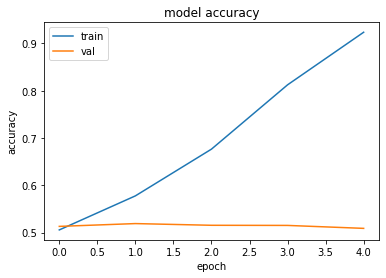

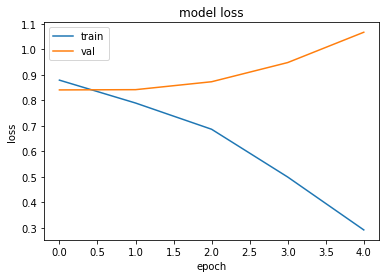

In [13]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/My Drive/python/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values


#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

# Accuracy plot for train and validation datasets
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss plot for train and validation datasets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Task-2

In [11]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

df = pd.read_csv('/content/drive/My Drive/python/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values


#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)


max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index)+1

#getting the vocabulary of data
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs = pad_sequences(sentences, maxlen=max_review_len)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=2, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
Train on 75000 samples, validate on 25000 samples
Epoch 1/2
75000/75000 [==============================] - 500s 7ms/step - loss: 1.1533 - acc: 0.4885 - val_loss: 0.9887 - val_acc: 0.5009
Epoch 2/2
25000/25000 [==============================] - 50s 2ms/step
Evaluation result on Test Data : Loss = 0.8641079890823364, accuracy = 0.49639999866485596


## Task-3

In [12]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

from sklearn.datasets import fetch_20newsgroups
newsgroups_train =fetch_20newsgroups(subset='train', shuffle=True)
sentences = newsgroups_train.data
y = newsgroups_train.target


#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)


max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index)+1

#getting the vocabulary of data
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs = pad_sequences(sentences, maxlen=max_review_len)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=2, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Train on 8485 samples, validate on 2829 samples
Epoch 1/2
8485/8485 [==============================] - 271s 32ms/step - loss: 9.2256 - acc: 0.0539 - val_loss: 3.0426 - val_acc: 0.0551
Epoch 2/2
2829/2829 [==============================] - 26s 9ms/step
Evaluation result on Test Data : Loss = 2.989705608269485, accuracy = 0.05655708909034729
